# Breast-cancer problem

In [80]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [2]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score
import itertools
from sklearn.metrics import confusion_matrix

In [3]:
DATA_N_PATH = "./data/Breast_data/breast-cancer.data.txt"

In [4]:
dictionary = {'recurrence_events':[], 'age':[], 'lt40':[], 'ge40':[],'premeno':[],
              'tumor_size':[], 'inv_nodes':[], 'node_caps':[], 'deg_malig':[], 'breast':[],
              'bq_left_up':[], 'bq_left_low':[], 'bq_right_up':[], 'bq_right_low':[], 'bq_central':[],  'irradiat' :[] }

def parse_line( line):
    recurrence_events = age = lt40 = ge40 = premeno = tumor_size = None
    inv_nodes = node_caps = deg_malig = breast = bq_left_up = bq_left_low = None
    bq_right_up = bq_right_low = bq_central = irradiat = None
    try:
        string = line.strip('\n').split(',')
        
        if ( string[0] == "recurrence-events"):
            recurrence_events = int(1)
        elif(string[0] == "no-recurrence-events"):
            recurrence_events = int(0)
        else: 
            raise Exception('wrong data')
        
      
        if ( string[1] == "10-19"):
            age = int(15)
        elif( string[1] == "20-29"):
            age = int(25)
        elif( string[1] == "30-39"):
            age = int(35)
        elif( string[1] == "40-49"):
            age = int(45)
        elif( string[1] == "50-59"):
            age = int(55)
        elif( string[1] == "60-69"):
            age = int(65)
        elif( string[1] == "70-79"):
            age = int(75)
        elif( string[1] == "80-89"):
            age = int(85)
        elif( string[1] == "90-99"):
            age = int(95)
        else:
            raise Exception('wrong data')
            
        if (string[2] == "lt40"):
            lt40 = int(1)
            ge40 = int(0)
            premeno = int(0)
        elif (string[2] == "ge40"):
            lt40 = int(0)
            ge40 = int(1)
            premeno = int(0)
        elif (string[2] == "premeno"):
            lt40 = int(0)
            ge40 = int(0)
            premeno = int(1)
        else:
            raise Exception('wrong data')
    
        m = re.match(r"(\d+)-(\d+)", string[3])
        if m:
            tumor_size =( int(m.group(1)) + int(m.group(2)))/2
        else:
            raise Exception('wrong data')
        
        m = re.match(r"(\d+)-(\d+)", string[4])
        if m:
            inv_nodes = ( int(m.group(1)) + int(m.group(2)))/2
        else:
            raise Exception('wrong data')
        
        if (string[5] == "no"):
            node_caps = int(0)
        elif (string[5] == "yes"):
            node_caps = int(1)
        else:
            raise Exception('wrong data')    
        
        deg_malig = int( string[6])
        
        if (string[7] == "left"):
            breast = int(0)
        elif (string[7] == "right"):
            breast = int(1)
        else:
            raise Exception('wrong data')
        
            
        if (string[8] == "left_up"):
            bq_left_up = int(1)
            bq_left_low = int(0)
            bq_right_up = int(0)
            bq_right_low = int(0)
            bq_central = int(0)
        elif (string[8] == "left_low"):
            bq_left_up = int(0)
            bq_left_low = int(1)
            bq_right_up = int(0)
            bq_right_low = int(0)
            bq_central = int(0)
        elif (string[8] == "right_up"):
            bq_left_up = int(0)
            bq_left_low = int(0)
            bq_right_up = int(1)
            bq_right_low = int(0)
            bq_central = int(0)   
        elif (string[8] == "right_low"):
            bq_left_up = int(0)
            bq_left_low = int(0)
            bq_right_up = int(0)
            bq_right_low = int(1)
            bq_central = int(0)
        elif (string[8] == "central"):
            bq_left_up = int(0)
            bq_left_low = int(0)
            bq_right_up = int(0)
            bq_right_low = int(0)
            bq_central = int(1)
        else:
            raise Exception('wrong data')
        
        if (string[9] == "no"):
            irradiat = int(0)
        elif (string[9] == "yes"):
            irradiat = int(1)
        else:
            raise Exception('wrong data')    
    except Exception as error:
        print( 'dropped', line)
    else:
        dictionary['recurrence_events'].append(recurrence_events)
        dictionary['age'].append( age)
        dictionary['lt40'].append( lt40)
        dictionary['ge40'].append( ge40)
        dictionary['premeno'].append( premeno)
        dictionary['deg_malig'].append( deg_malig)
        dictionary['tumor_size'].append( tumor_size)
        dictionary['inv_nodes'].append( inv_nodes)
        dictionary['node_caps'].append( node_caps)
        dictionary['breast'].append( breast)
        dictionary['bq_left_up'].append( bq_left_up)
        dictionary['bq_left_low'].append( bq_left_low)
        dictionary['bq_right_up'].append( bq_right_up)
        dictionary['bq_right_low'].append( bq_right_low)        
        dictionary['bq_central'].append( bq_central)
        dictionary['irradiat'].append( irradiat)

        


with open (DATA_N_PATH, "r") as file:
    for line in file.readlines():
        for sline in line.split(';'):
            if sline.strip():
                parse_line( sline)



dropped no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes

dropped no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes

dropped no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes

dropped no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes

dropped no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes

dropped recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no

dropped recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes

dropped recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no

dropped recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no



In [5]:
row_data = pd.DataFrame(data = dictionary).values
##row_data = row_data.sort_values(by = ['user', 'time'])
pd.DataFrame(data = dictionary).head()

,recurrence_events,age,lt40,ge40,premeno,tumor_size,inv_nodes,node_caps,deg_malig,breast,bq_left_up,bq_left_low,bq_right_up,bq_right_low,bq_central,irradiat
0,0,35,0,0,1,32.0,1.0,0,3,0,0,1,0,0,0,0
1,0,45,0,0,1,22.0,1.0,0,2,1,0,0,1,0,0,0
2,0,45,0,0,1,22.0,1.0,0,2,0,0,1,0,0,0,0
3,0,65,0,1,0,17.0,1.0,0,2,1,1,0,0,0,0,0
4,0,45,0,0,1,2.0,1.0,0,2,1,0,0,0,1,0,0


In [45]:

dataset = row_data

X_train, X_test, y_train, y_test = train_test_split(dataset[:,1:15], dataset[:,0:1], test_size=0.25, stratify=dataset[:,0:1])
X_train = (X_train - X_train.mean()) / (X_train.std())
X_test = (X_test - X_test.mean()) / (X_test.std())

model = Sequential()
model.add(Dense(15, input_dim=14, activation='relu')) 
#model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # сигмоида вместо relu для определения вероятности
 

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
 
# обучаем нейронную сеть
history = model.fit(X_test, y_test, epochs = 100, batch_size=10)

# оцениваем результат
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
70/70 [==============================] - 0s 7ms/step - loss: 0.7234 - acc: 0.2714
Epoch 2/100
70/70 [==============================] - 0s 162us/step - loss: 0.6922 - acc: 0.5714
Epoch 3/100
70/70 [==============================] - 0s 271us/step - loss: 0.6697 - acc: 0.7143
Epoch 4/100
70/70 [==============================] - 0s 353us/step - loss: 0.6516 - acc: 0.7143
Epoch 5/100
70/70 [==============================] - 0s 222us/step - loss: 0.6358 - acc: 0.7143
Epoch 6/100
70/70 [==============================] - 0s 241us/step - loss: 0.6203 - acc: 0.7143
Epoch 7/100
70/70 [==============================] - 0s 229us/step - loss: 0.6126 - acc: 0.7143
Epoch 8/100
70/70 [==============================] - 0s 214us/step - loss: 0.6027 - acc: 0.7143
Epoch 9/100
70/70 [==============================] - 0s 281us/step - loss: 0.5989 - acc: 0.7143
Epoch 10/100
70/70 [==============================] - 0s 316us/step - loss: 0.5948 - acc: 0.7143
Epoch 11/100
70/70 [=====================

70/70 [==============================] - 0s 307us/step - loss: 0.4948 - acc: 0.7571
Epoch 86/100
70/70 [==============================] - 0s 281us/step - loss: 0.4941 - acc: 0.7571
Epoch 87/100
70/70 [==============================] - 0s 298us/step - loss: 0.4936 - acc: 0.7571
Epoch 88/100
70/70 [==============================] - 0s 247us/step - loss: 0.4924 - acc: 0.7571
Epoch 89/100
70/70 [==============================] - 0s 189us/step - loss: 0.4913 - acc: 0.7571
Epoch 90/100
70/70 [==============================] - 0s 194us/step - loss: 0.4917 - acc: 0.7714
Epoch 91/100
70/70 [==============================] - 0s 204us/step - loss: 0.4880 - acc: 0.7714
Epoch 92/100
70/70 [==============================] - 0s 248us/step - loss: 0.4872 - acc: 0.7714
Epoch 93/100
70/70 [==============================] - 0s 210us/step - loss: 0.4858 - acc: 0.7714
Epoch 94/100
70/70 [==============================] - 0s 203us/step - loss: 0.4862 - acc: 0.7857
Epoch 95/100
70/70 [=======================

In [67]:
def seq_fit(x_train):
    N =  8
    acc = [0.0] *N
    epochs = [10, 20,50, 100,200,500,1000,2000]#,5000,10000]

    for i in range(N):
        model.fit(x_train, y_train, epochs = epochs[i],verbose = 0, batch_size=10)
        scores = model.evaluate(X_test, y_test)
        acc[i]= scores[1]*100
    return np.log(epochs), acc

In [76]:
x,y = seq_fit(X_train)

70/70 [==============================] - 0s 85us/step


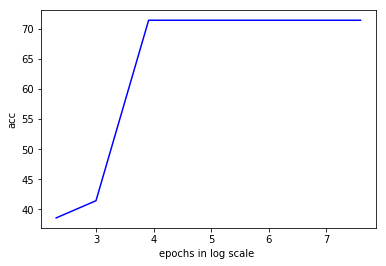

In [77]:
plt.plot(x, y, color= 'b')
plt.xlabel('epochs in log scale ')
plt.ylabel("acc")
plt.show()

## наложим шум

In [68]:
sigma = [0.1, 0.3, 0.5, 0.7]
noise = np.random.normal(0, sigma[0], X_train.shape)
x,y = seq_fit(X_train+ noise)


70/70 [==============================] - 0s 29us/step


## sigma 0.1

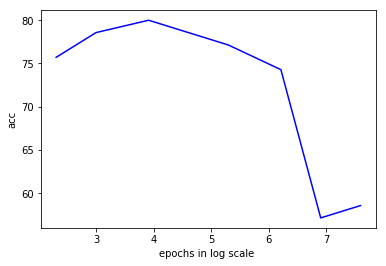

In [69]:
plt.plot(x, y, color= 'b')
plt.xlabel('epochs in log scale ')
plt.ylabel("acc")
plt.show()

In [70]:
noise = np.random.normal(0, sigma[1], X_train.shape)
x,y = seq_fit(X_train+ noise)

70/70 [==============================] - 0s 30us/step


## sigma 0.3

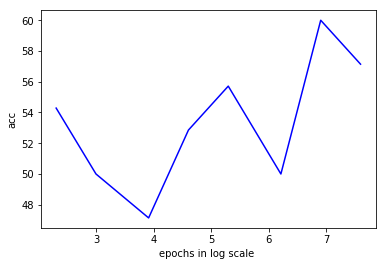

In [71]:
plt.plot(x, y, color= 'b')
plt.xlabel('epochs in log scale ')
plt.ylabel("acc")
plt.show()

In [72]:
noise = np.random.normal(0, sigma[2], X_train.shape)
x,y = seq_fit(X_train+ noise)

70/70 [==============================] - 0s 52us/step


## sigma 0.5

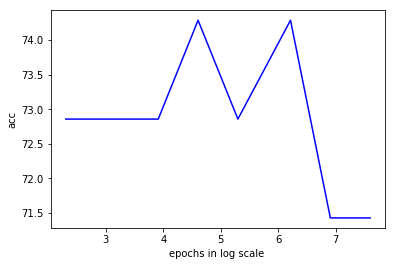

In [73]:
plt.plot(x, y, color= 'b')
plt.xlabel('epochs in log scale ')
plt.ylabel("acc")
plt.show()

In [74]:
noise = np.random.normal(0, sigma[3], X_train.shape)
x,y = seq_fit(X_train+ noise)

70/70 [==============================] - 0s 29us/step


## sigma 0.7

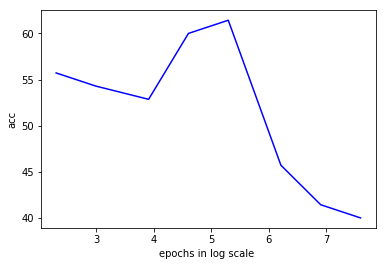

In [75]:
plt.plot(x, y, color= 'b')
plt.xlabel('epochs in log scale ')
plt.ylabel("acc")
plt.show()